![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Derivadas aproximadas

Nem sempre é possível calcular a derivada de uma função.
Às vezes, a função em questão não é dada de forma explícita.
Por exemplo,
$$f(x) = \min_{|y| < x} \Big( \frac{\cos(2x^2 - 3y)}{20x - y}  \Big).$$

Assim, teremos que _estimar_ a derivada de $f$, sem calculá-la explicitamente.

A idéia principal é que
$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}, $$
ou seja, que a derivada é o limite do "quociente fundamental".
Podemos usar o computador para estimar este limite:

In [3]:
def df(f, x, h=1e-5):
    return (f(x+h) - f(x))/h

### Exercício: "Esta função é vetorial"?

Ou seja, se passarmos um vetor `x` em argumento, vai dar certo?
Em que condições?

Desde que a nossa F seja uma função vetorial, não haverá problemas.

### Exercício

Calcule a derivada do seno no intervalo $[0,7]$ por este método,
e compare com o resultado teórico.

In [4]:
xs = np.arange(0, 7, 0.10)  # Analisando que a derivada é o cos, devemos analisar se é parecido.
print(df(np.sin, xs))
print('\n',np.cos(xs))


[ 1.          0.99500367  0.98006558  0.95533501  0.92105905  0.87758016
  0.82533279  0.76483897  0.69670312  0.62160605  0.5402981   0.45359167
  0.36235309  0.26749401  0.16996222  0.07073221 -0.02920452 -0.12884945
 -0.22720696 -0.3232943  -0.41615138 -0.50485042 -0.58850516 -0.66627975
 -0.73739709 -0.80114661 -0.85689133 -0.90407428 -0.94222402 -0.97095936
 -0.9899932  -0.99913536 -0.99829448 -0.98747898 -0.96679691 -0.93645493
 -0.8967562  -0.84809738 -0.79096465 -0.72592887 -0.65363984 -0.57481986
 -0.49025646 -0.40079459 -0.30732811 -0.21079091 -0.11214756 -0.01238366
  0.08750396  0.18651728  0.28366698  0.37798237  0.46852109  0.5543785
  0.63469674  0.7086733   0.77556903  0.83471554  0.88552184  0.9274803
  0.96017168  0.98326935  0.99654251  0.99985855  0.99318434  0.97658655
  0.95023103  0.91438112  0.86939502  0.81572221]

 [ 1.          0.99500417  0.98006658  0.95533649  0.92106099  0.87758256
  0.82533561  0.76484219  0.69670671  0.62160997  0.54030231  0.45359612
 

### Exercício

Muitas vezes, a função que vamos usar é "vetorial", como por exemplo `sin`, `exp`.
Mas às vezes não é tão simples escrever uma forma vetorial para uma função.
Nestes casos, não podemos usar tão diretamente as funções acima para fazer gráficos,
e em vez disso devemos construir as listas (ou, melhor, `array`s) nós mesmos.

Vejamos um exemplo:

Seja $y = f(t)$ a raiz de $t\cos(x) = x$.
Uma forma de calcular $f$ seria, por exemplo,
usando o método da bisseção.
Por exemplo:

In [5]:
def bissection(f, a, b, tol=1e-8):
    while True:
        z = (a + b)/2
        
        if abs(f(z)) < tol:
            return z
        
        if f(a)*f(z) < 0:
            b = z
        else:
            a = z
    

In [6]:
def f(t):
    
    def g(x):
        return t*np.cos(x) - x
    
    return bissection(g,-np.pi/2,np.pi/2, tol=1e-8)

Agora, escreva uma função `fvect` que recebe um array do numpy e retorna o array correspondente a todas as $f(t)$
para cada $t$ no array.

In [7]:
def fvect(array):
    resposta = []
    
    for x in array:
        resposta.append(f(x))
    
    return resposta

E agora, veja o gráfico de f.

[-3.0000000e+00 -2.9500000e+00 -2.9000000e+00 -2.8500000e+00
 -2.8000000e+00 -2.7500000e+00 -2.7000000e+00 -2.6500000e+00
 -2.6000000e+00 -2.5500000e+00 -2.5000000e+00 -2.4500000e+00
 -2.4000000e+00 -2.3500000e+00 -2.3000000e+00 -2.2500000e+00
 -2.2000000e+00 -2.1500000e+00 -2.1000000e+00 -2.0500000e+00
 -2.0000000e+00 -1.9500000e+00 -1.9000000e+00 -1.8500000e+00
 -1.8000000e+00 -1.7500000e+00 -1.7000000e+00 -1.6500000e+00
 -1.6000000e+00 -1.5500000e+00 -1.5000000e+00 -1.4500000e+00
 -1.4000000e+00 -1.3500000e+00 -1.3000000e+00 -1.2500000e+00
 -1.2000000e+00 -1.1500000e+00 -1.1000000e+00 -1.0500000e+00
 -1.0000000e+00 -9.5000000e-01 -9.0000000e-01 -8.5000000e-01
 -8.0000000e-01 -7.5000000e-01 -7.0000000e-01 -6.5000000e-01
 -6.0000000e-01 -5.5000000e-01 -5.0000000e-01 -4.5000000e-01
 -4.0000000e-01 -3.5000000e-01 -3.0000000e-01 -2.5000000e-01
 -2.0000000e-01 -1.5000000e-01 -1.0000000e-01 -5.0000000e-02
 -1.0658141e-14  5.0000000e-02  1.0000000e-01  1.5000000e-01
  2.0000000e-01  2.50000

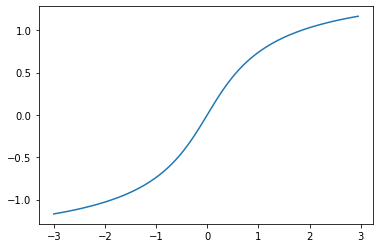

In [8]:
v = np.arange(-3,3,0.05)
print(v, '\n', fvect(v))
plt.plot(v, fvect(v));
plt.show()

Com a ajuda da fvect, faça um gráfico da derivada de $f$.

In [ ]:
### Resposta aqui


## Estimando o erro

Uma atividade importante ao se construir um método numérico é calcular (ou ao menos estimar) o erro cometido.
Em geral, estimativas de erros são feitas com mais do que as hipóteses mínimas para o método.
Por exemplo, no caso do método de Newton, basta a função ser derivável para podermos usá-lo,
mas para mostrar convergência quadrática, temos que supor que ela terá duas derivadas,
e que o quociente $\frac{f''(\xi)}{2f'(x)}$ seja limitado no intervalo de convergência.

Vamos, então, seguir este padrão: queremos calcular a primeira derivada,
e para estimar o erro suporemos que a função é duas vezes derivável.
Assim:
$$ \frac{f(x+h) - f(x)}{h} - f'(x) = \frac{\big(f(x) + h f'(x) + \frac{h^2}{2} f''(\xi) \big) - f(x)}{h} - f'(x)
   = \frac{h f''(\xi)}{2}.$$

No caso de $f(x) = \sin(x)$, o erro estará aproximadamente entre $h (-\sin(x))/2$ e $h (-\sin(x+h))/2$.
Vejamos o quão próximo isto é de fato:

In [ ]:
plt.title('Erro na estimativa do erro ("erro do erro")')
plt.plot(xs, (dfx_approx - dfx) - (- 1e-5 * np.sin(xs) / 2))
plt.show()

O exemplo anterior mostra que, se desejamos aproximar a derivada de uma função "bem-comportada" pelo quociente fundamental,
o erro será proporcional ao **passo** e à derivada segunda (que, em geral, não conhecemos!).
Assim, para diminuir o erro, teremos que diminuir igualmente o passo.
Mas isso pode resultar em erros de truncamento...

In [ ]:
dfx_approx_2 = df(np.sin,xs, h=1e-10)

_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15,4))
ax1.set_title('Erro de aproximação')
ax1.plot(xs, dfx_approx_2 - dfx)

ax2.set_title('Erro na estimativa do erro')
ax2.plot(xs, (dfx_approx_2 - dfx) - (- 1e-10 * np.sin(xs)/2))
plt.show()

### Exercício: vendo o truncamento

Porque faz sentido, dados os gráficos acima,
atribuir o erro de aproximação à precisão numérica do computador,
e não à derivada segunda?

Note que o erro de aproximação não está mais proporcional a $\varepsilon$.
Para resolver isso, precisamos de um método de cálculo cujo erro seja menor!